# Lecture 8: Classification I

Welcome to **Lecture 8** on **Classification**! In this notebook, we will explore one of the most fundamental techniques in machine learning: **classification**. We'll see how we can predict categorical outcomes from given features, using logistic regression as our main tool.

### Supervised vs. Unsupervised Learning

Before diving into classification, let's talk about the difference between **supervised** and **unsupervised learning**:
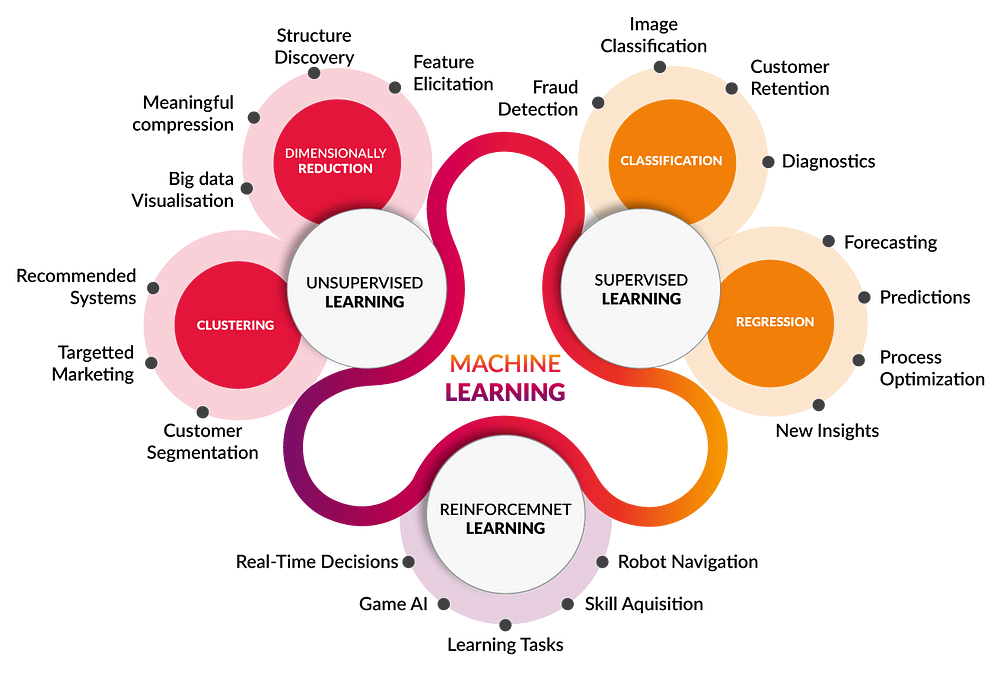
- **Supervised Learning**: Involves learning from labeled data. The algorithm is given both the input data and the corresponding output labels. Examples include **classification** (predicting a label like "spam or not spam") and **regression** (predicting a continuous value like house price).
- **Unsupervised Learning**: Involves learning from unlabeled data. The algorithm only has access to input data, and it tries to find patterns or groupings within it. Examples include **clustering** (like customer segmentation) and **dimensionality reduction**.

In this notebook, we will focus on **classification**, a supervised learning technique.

> Fun Quote by Andriy Burkov: *"Expert systems, data mining, predictive analytics, data science, machine learning, AI. What will be the next buzzword used to sell logistic regression?"*

We will cover the following key topics:

1. **[Classification](#classification)**: What it is and how it differs from regression.
2. **[Regression on Probabilities](#regression-on-probabilities)**: Why linear regression isn't ideal for predicting probabilities.
3. **[The Logistic Model](#the-logistic-model)**: How the sigmoid function helps in classification.
4. **[Logistic Loss Function](#logistic-loss-function)**: Using cross-entropy instead of MSE.
5. **[Fitting a Logistic Model](#fitting-a-logistic-model)**: Gradient descent and its role in fitting logistic regression.

Let’s start by understanding **classification** in more detail.


## Setup Notebook

In [ ]:
%pip install -r requirements.txt

In [3]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pylab as plt
from ipywidgets import interact, fixed, IntSlider

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

<a id='classification'></a>
## 1. Classification

**Classification** is a type of supervised learning where the goal is to predict a categorical label from given features. Unlike regression, which predicts continuous outcomes (e.g., house price), classification predicts discrete categories (e.g., spam or not spam).

In this section, we'll:
- Explore the differences between **binary classification** and **multiclass classification**.
- See examples of real-world classification tasks.

Let’s start by loading a dataset and examining a simple classification problem.


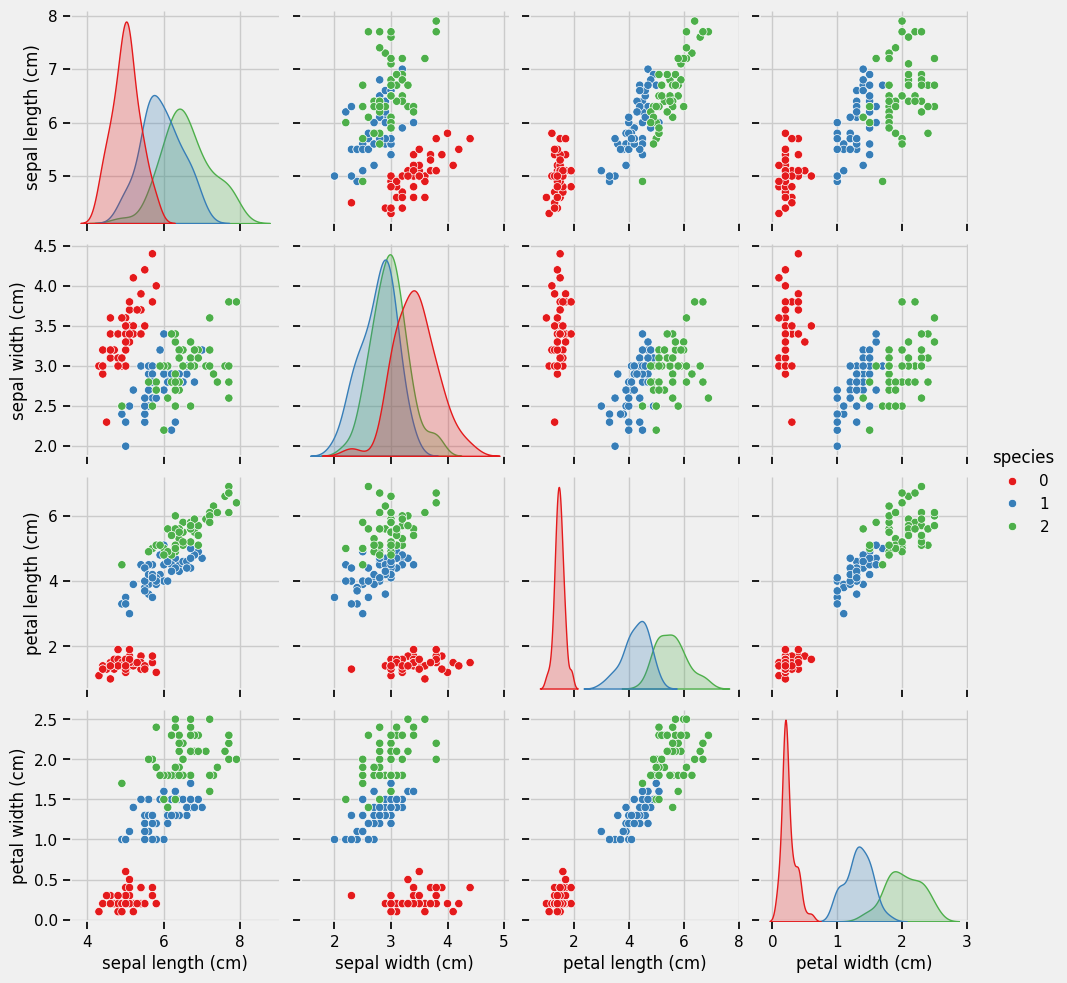

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset (multiclass classification example)
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Plotting the dataset using seaborn pairplot to visualize species separation
sns.pairplot(iris_df, hue='species', palette='Set1')
plt.show()


### What Just Happened? 🤔

We loaded the famous **Iris dataset**, which contains measurements of iris flowers and their corresponding species. This is a classic **multiclass classification** problem where our goal is to predict which species a flower belongs to based on its features.

The plot above visualizes how different features (e.g., petal length, petal width) can help separate the three species. This separation is what classification is all about—using feature data to determine the category a data point belongs to.


<a id='regression-on-probabilities'></a>
## 2. Regression on Probabilities

One might think to use **linear regression** to predict probabilities for classification tasks. However, linear regression has a major limitation—it can produce predictions outside the range [0, 1], making it unsuitable for probabilities.

In this section, we'll:
- Understand why linear regression fails at predicting probabilities.
- Use **LeBron's shot data** to visualize the problem.

Let's dive into an example using LeBron's shot data.


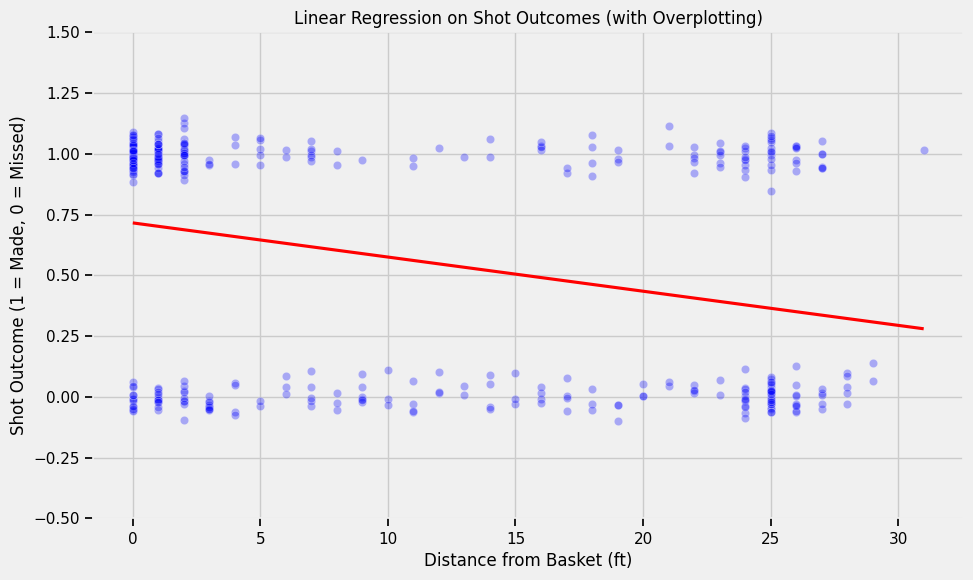

In [18]:
# Load LeBron's shot data
lebron_df = pd.read_csv('lebron.csv')

# Display the first few rows to understand the data
lebron_df.head()

# Simulated basketball shot data: distance from basket vs. outcome (1 = made, 0 = missed)
distance = lebron_df['shot_distance']
outcome = lebron_df['shot_made']

# Plotting the data with jitter to illustrate overplotting
plt.figure(figsize=(10, 6))

# Adding jitter to reduce overplotting and help visualize density
jittered_outcome = outcome + np.random.normal(0, 0.05, size=len(outcome))
plt.scatter(distance, jittered_outcome, alpha=0.3, color='blue', edgecolor='w', linewidth=0.5)

# Plotting a linear regression line to illustrate the problem
sns.regplot(x=distance, y=outcome, logistic=False, ci=None, scatter=False, color='red')

plt.xlabel('Distance from Basket (ft)')
plt.ylabel('Shot Outcome (1 = Made, 0 = Missed)')
plt.title('Linear Regression on Shot Outcomes (with Overplotting)')
plt.ylim(-0.5, 1.5)
plt.show()


### Why Doesn't Linear Regression Work for Classification?

In this plot, we used **LeBron James's shot data** to predict whether he would make a shot based on the **distance from the basket**. The original data points show significant **overplotting** (where many data points overlap, especially around 0 and 1), making it difficult to assess trends effectively.

To reduce overplotting, we added some **jitter** to the outcome variable, which allows us to better visualize the density of points. However, even with jitter, you can see that the linear regression line fails to adequately fit this type of data—it continues outside the [0, 1] range, making incorrect predictions that are not valid probabilities.

This is where the **logistic model** comes in: it ensures all predictions fall within a valid probability range, effectively dealing with overplotting issues and producing better-fitting curves.


<a id='the-logistic-model'></a>
## 3. The Logistic Model

In regression, we learned about using a linear model to predict outcomes. However, for **classification** tasks, we need a model that predicts probabilities that always fall between **0 and 1**. This is where the **logistic model** comes in.

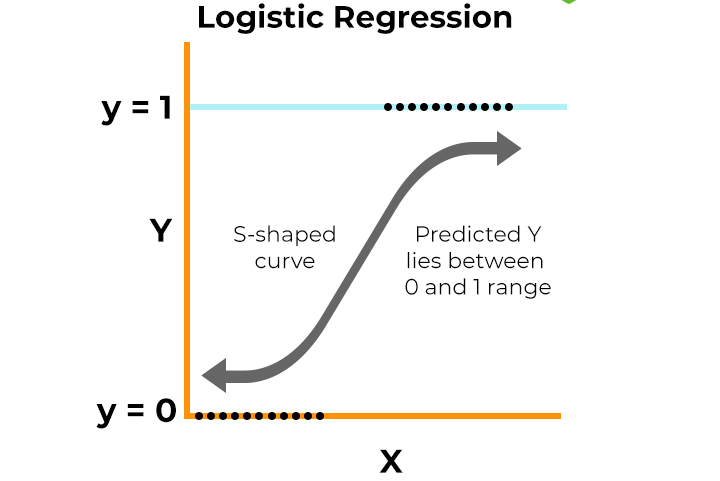

The **logistic model** uses a **sigmoid function** to transform the linear combination of inputs into a probability. This way, we can use it to predict whether an event will happen (like a player making a shot or not).

In this section, we'll:
- Introduce the **sigmoid function** and understand its importance in converting a linear output into a probability.
- Use **LeBron's shot data** to show how the logistic function provides meaningful results for classification tasks.


Let’s take a closer look at the sigmoid function and how it helps with classification by visualizing its effect.
Plotting the Sigmoid Function

The sigmoid function takes a real-valued number and "squashes" it between 0 and 1. Let’s visualize the sigmoid curve.

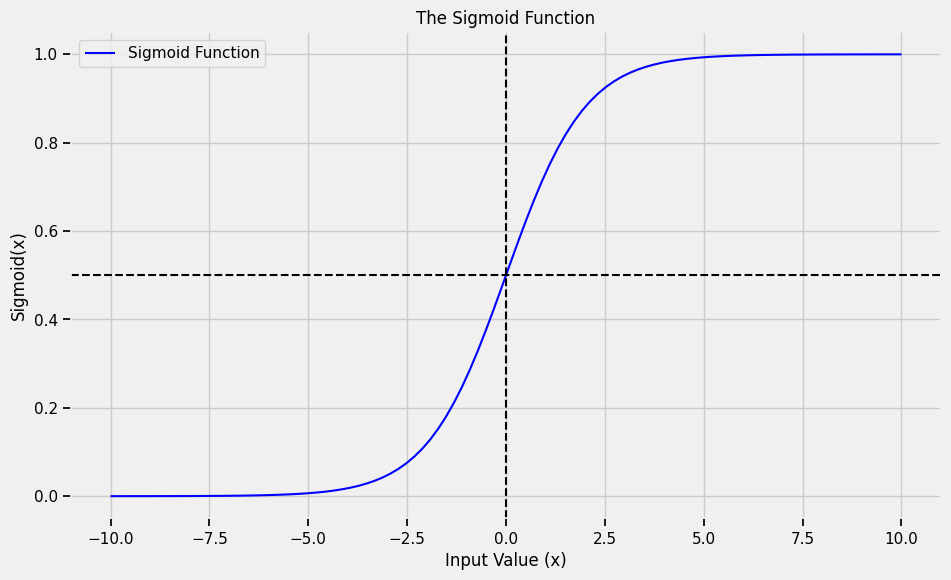

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plotting the sigmoid function
x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Sigmoid Function', color='blue')
plt.xlabel('Input Value (x)')
plt.ylabel('Sigmoid(x)')
plt.title('The Sigmoid Function')
plt.axvline(0, color='black', linestyle='--')  # Marking x=0
plt.axhline(0.5, color='black', linestyle='--')  # Marking y=0.5
plt.legend()
plt.show()


Now let’s use the LeBron shot dataset to fit a logistic model. We'll predict whether a shot will be made based on the distance from the basket. Logistic regression, unlike linear regression, constrains the predicted probability to lie between 0 and 1.

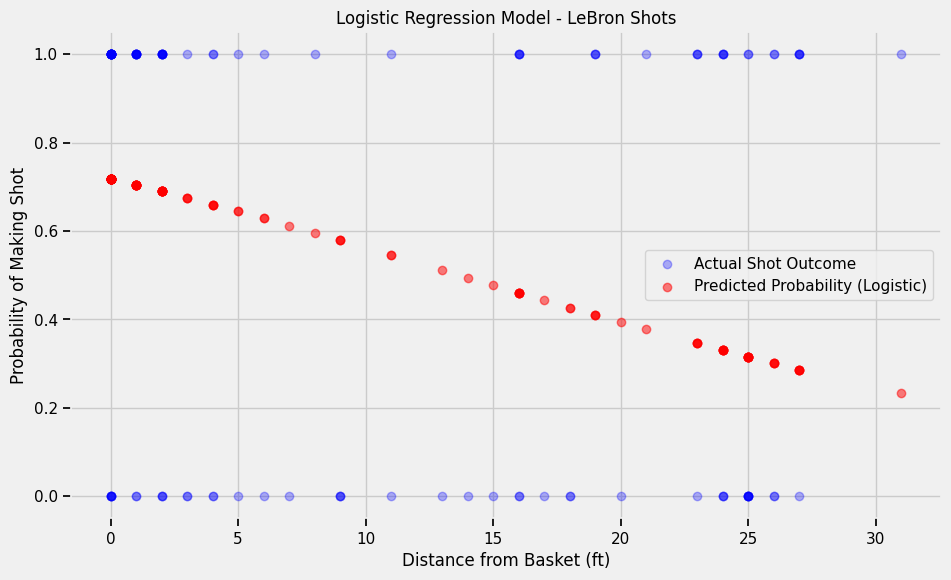

Model Accuracy: 0.59

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.49      0.48        45
           1       0.67      0.66      0.67        71

    accuracy                           0.59       116
   macro avg       0.57      0.58      0.58       116
weighted avg       0.60      0.59      0.60       116



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load LeBron's shot data
lebron_df = pd.read_csv('lebron.csv')

# Extracting feature and target variables
X = lebron_df[['shot_distance']]  # Distance from basket (feature)
y = lebron_df['shot_made']         # Shot outcome (target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
y_pred = logistic_model.predict(X_test)

# Plotting the sigmoid fit (logistic regression results)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.3, label='Actual Shot Outcome', color='blue')
plt.scatter(X_test, y_pred_proba, color='red', alpha=0.5, label='Predicted Probability (Logistic)')
plt.xlabel('Distance from Basket (ft)')
plt.ylabel('Probability of Making Shot')
plt.title('Logistic Regression Model - LeBron Shots')
plt.legend()
plt.show()

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


### Why Use the Sigmoid Function?

In the first plot, we visualized the **sigmoid function**, which is used to convert the output of a linear model into a **probability** between **0 and 1**. This is crucial for classification tasks where the goal is to predict the likelihood of a specific event occurring.

In the second plot, we used **LeBron's shot data** to predict whether a shot will be made based on the **distance from the basket**. The **red points** represent the **predicted probability** of making the shot, given the distance.

As we can see, closer distances generally have higher predicted probabilities, while longer distances have lower probabilities, which aligns with our intuition. The **logistic model** effectively transforms the linear output into meaningful probabilities for making predictions.

The logistic model uses **gradient descent** to minimize the **cross-entropy loss**, which allows it to learn from data and make accurate probability-based predictions.


<a id='logistic-loss-function'></a>
## 4. Logistic Loss Function

In regression tasks, we often use **Mean Squared Error (MSE)** as our loss function. However, for classification tasks, using MSE can lead to problems—it results in a **non-convex** loss surface that is difficult to optimize effectively.

Instead, we use **cross-entropy loss**, which measures the difference between the true label and the predicted probability in a way that ensures **convexity** of the loss function. This allows optimization algorithms like **gradient descent** to easily converge to a minimum and find the best parameters for our model.

Here’s a summary of different loss functions used for **regression**, **binary classification**, and **multinomial classification**:

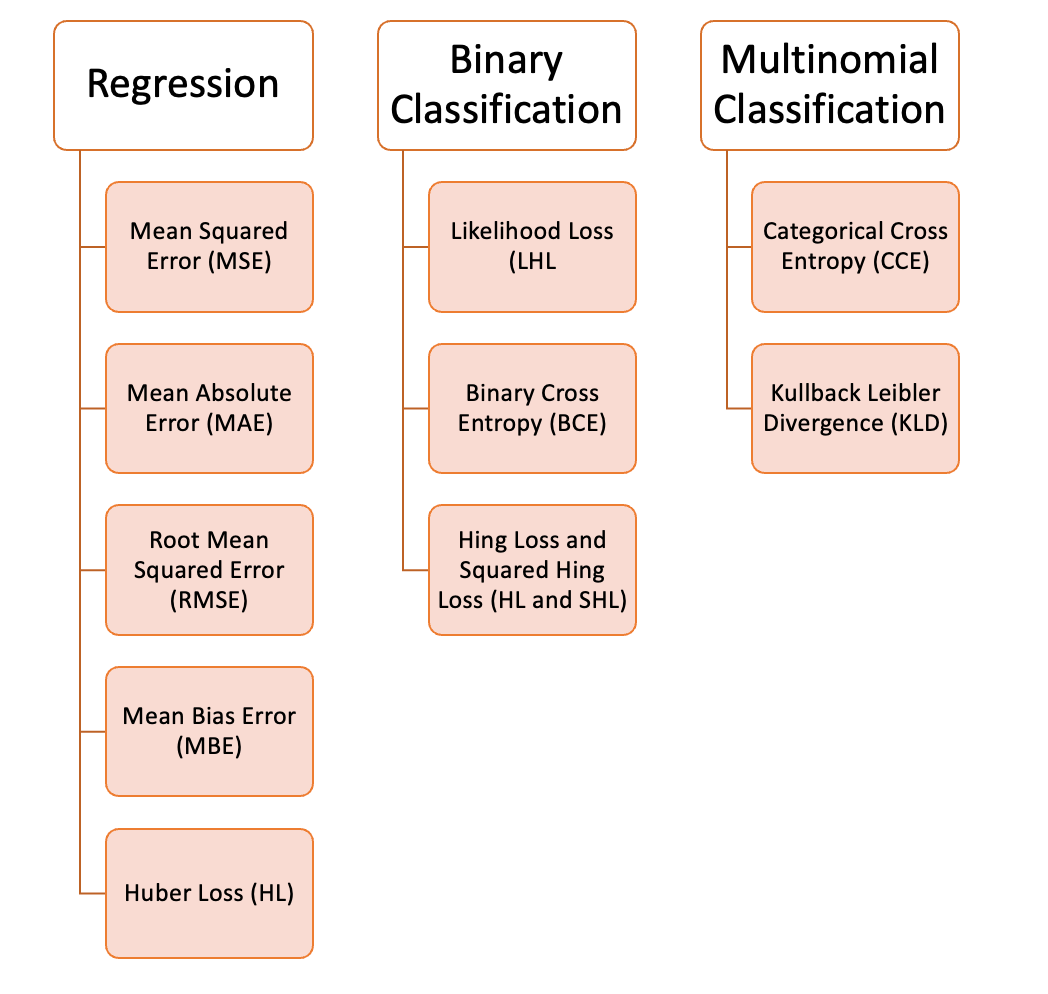

Recall from lecture that how we compared the **cost surfaces** for **MSE** and **cross-entropy loss**:

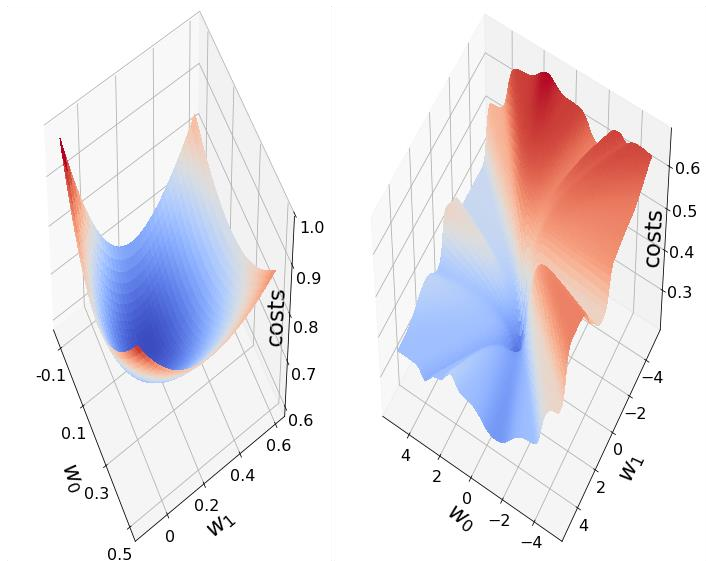

In this section, we'll:
- Understand the limitations of MSE for classification.
- Introduce **cross-entropy loss** and its advantages.

### Cross-Entropy Loss Function: The Math

For a **binary classification** task, the **cross-entropy loss** function is defined as:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Where:

- $y$ is the **true label** (either 0 or 1).
- $\hat{y}$ is the **predicted probability** that the label is 1 (i.e., $\hat{y} \in [0, 1]$).

To understand this formula better, let’s break it down:

- **Two Components**:
  - If $y = 1$: The loss function becomes $-\log(\hat{y})$. This means that if the model predicts a probability close to 1 for the correct class (which is 1), the loss is very small. However, if the model predicts a low probability (close to 0), the loss becomes very large.
  - If $y = 0$: The loss function becomes $-\log(1 - \hat{y})$. Similarly, if the model predicts a probability close to 0 for the correct class (which is 0), the loss is small. But if it predicts a value close to 1, the loss is high.

- **Penalty for Confident Mistakes**:
  - Cross-entropy penalizes the model more heavily for **confident incorrect predictions**. If the true label is 1 and the model confidently predicts 0 (i.e., $\hat{y}$ close to 0), the loss value will be very high. This behavior forces the model to be more careful when making predictions, encouraging it to produce probabilities that reflect its uncertainty accurately.

- **Convexity**:
  - The **convex** nature of the cross-entropy loss function ensures that the optimization landscape is easier to navigate. Gradient descent works best with convex functions because it can reliably find the **global minimum**, allowing our logistic regression model to find the optimal parameters.


### Intuition: Why Does Cross-Entropy Work So Well?

Think of cross-entropy loss as a measure of "distance" between the **true distribution** (the true label) and the **predicted distribution** (the predicted probability). The smaller the cross-entropy, the closer the model’s predicted probability is to the true label.

Here’s why it works so well:

- **Punishes Wrong Certainty**: Cross-entropy loss punishes wrong certainty more heavily than a mistake with less confidence. For instance, if the true label is 1 and the model predicts $\hat{y} = 0.05$, it incurs a higher penalty than predicting $\hat{y} = 0.45$. This helps the model learn to be less confident when it is unsure, thereby improving calibration.
- **Probabilistic Interpretation**: Cross-entropy loss has a natural probabilistic interpretation. It essentially asks, "How close is the predicted probability distribution to the actual outcome?" By minimizing this difference, the model learns to be more accurate in terms of **probability estimation**.
- **Smoother Gradients**: The gradient of cross-entropy loss is well-behaved for both small and large predicted values. This means that the **weight updates** are more stable during training, allowing the model to converge faster without the risk of **vanishing gradients**.

### Visualizing Cross-Entropy Loss vs. MSE

Let’s now visualize **cross-entropy loss** and **MSE** to understand why cross-entropy is a better choice for classification tasks.


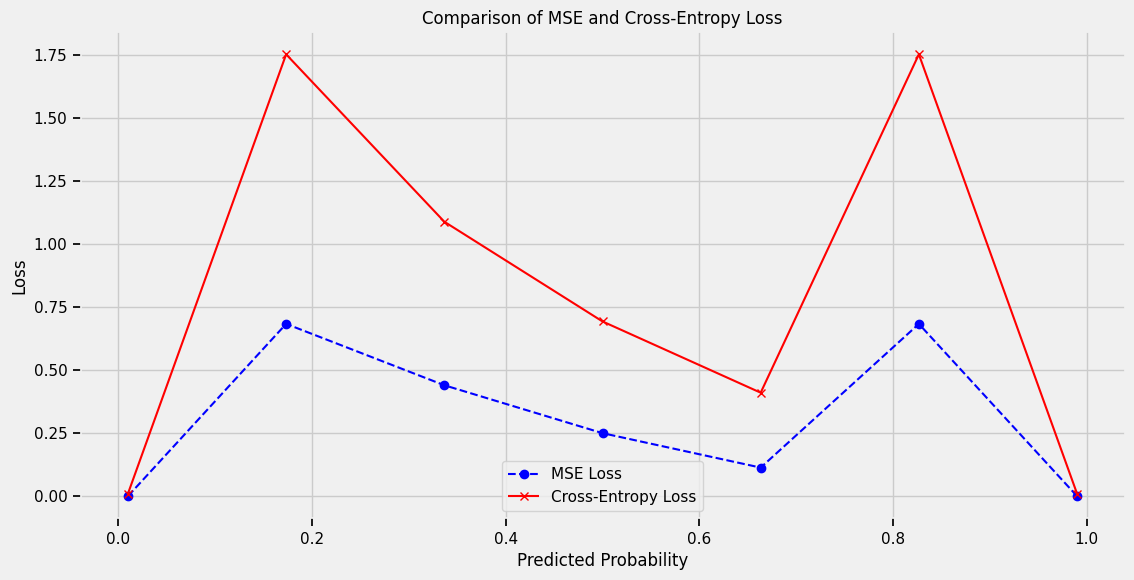

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define ground truth labels and predicted probabilities
y_true = np.array([0, 1, 1, 0, 1, 0, 1])
pred_probs = np.linspace(0.01, 0.99, len(y_true))

# Calculate MSE loss for each prediction
mse_loss = (y_true - pred_probs) ** 2

# Calculate cross-entropy loss for each prediction
epsilon = 1e-9  # Small value to avoid log(0)
cross_entropy_loss = -(y_true * np.log(pred_probs + epsilon) + (1 - y_true) * np.log(1 - pred_probs + epsilon))

# Plotting the loss functions
plt.figure(figsize=(12, 6))
plt.plot(pred_probs, mse_loss, label='MSE Loss', linestyle='--', color='blue', marker='o')
plt.plot(pred_probs, cross_entropy_loss, label='Cross-Entropy Loss', linestyle='-', color='red', marker='x')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.title('Comparison of MSE and Cross-Entropy Loss')
plt.legend()
plt.show()


### Why Use Cross-Entropy Loss?

In the plot above, we can see two loss functions for classification:

- **MSE Loss**: The blue curve represents the **Mean Squared Error**. For classification, MSE results in a non-convex optimization surface, making it challenging for algorithms like **gradient descent** to find the global minimum.
  
- **Cross-Entropy Loss**: The red curve represents **cross-entropy loss**, which is **convex**. Convexity ensures that gradient descent can easily converge to an optimal solution, making training much more efficient and effective for classification models.

The figure above provides an overview of different loss functions used in **regression** and **classification**:
- For **regression**, loss functions like **MSE**, **MAE**, and **Huber Loss** are commonly used.
- For **binary classification**, **Binary Cross Entropy (BCE)** is widely used.
- For **multinomial classification**, **Categorical Cross Entropy (CCE)** is used to handle multiple categories effectively.

Using **cross-entropy loss** means that we can effectively train our logistic model to accurately predict probabilities that match the true labels. It penalizes incorrect confident predictions more harshly, encouraging the model to be conservative with uncertain predictions and highly confident when certain.


<a id='fitting-a-logistic-model'></a>
## 5. Fitting a Logistic Model

Now that we understand the fundamentals of **cross-entropy loss**, it’s time to apply this knowledge in practice by fitting a **logistic regression model**. Logistic regression helps us predict a binary outcome, typically 0 or 1, using one or more predictor variables.

In this section, we will:
- Fit a logistic model using **gradient descent**.
- Use **NBA shot data** to demonstrate how we can train the logistic regression model to predict whether a shot will be made based on the distance from the basket.

### What is Logistic Regression?

Logistic regression is a linear model used for **binary classification**. Unlike linear regression, it predicts probabilities, which allows us to classify observations as belonging to one of two classes. It uses the **sigmoid function** to map predicted values to probabilities between 0 and 1.

The equation for logistic regression is:

$$
\hat{y} = \frac{1}{1 + e^{-(w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n)}}
$$

Where:
- $\hat{y}$ is the predicted probability.
- $w_0, w_1, \ldots, w_n$ are the model weights.
- $x_1, x_2, \ldots, x_n$ are the features.

We train the model by minimizing the **cross-entropy loss** function using **gradient descent**.

We’ll use scikit-learn to perform logistic regression on NBA data. Our aim is to predict whether a shot will be made based on the shot_distance feature.

In [26]:
# Load NBA dataset
nba = pd.read_csv('nba.csv')
nba.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22017,1610612744,GSW,Golden State Warriors,21700002,2017-10-17,GSW vs. HOU,L,240,43,...,35,41,34,5,9,17,25,121,-1,1
1,22017,1610612745,HOU,Houston Rockets,21700002,2017-10-17,HOU @ GSW,W,240,47,...,33,43,28,9,5,13,16,122,1,1
2,22017,1610612738,BOS,Boston Celtics,21700001,2017-10-17,BOS @ CLE,L,240,36,...,37,46,24,11,4,12,24,99,-3,1
3,22017,1610612739,CLE,Cleveland Cavaliers,21700001,2017-10-17,CLE vs. BOS,W,240,38,...,41,50,19,3,4,17,25,102,3,1
4,22017,1610612750,MIN,Minnesota Timberwolves,21700011,2017-10-18,MIN @ SAS,L,240,37,...,31,42,23,7,4,13,16,99,-8,1


Add 'WON' Column Based on Game Outcome

In [27]:
# Create a new column indicating whether the game was won or lost
nba["WON"] = nba["WL"]  # Copy the WL column to WON
nba["WON"] = nba["WON"].replace("W", 1)  # Replace 'W' with 1 (win)
nba["WON"] = nba["WON"].replace("L", 0)  # Replace 'L' with 0 (loss)
nba.head(5)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,WON
0,22017,1610612744,GSW,Golden State Warriors,21700002,2017-10-17,GSW vs. HOU,L,240,43,...,41,34,5,9,17,25,121,-1,1,0
1,22017,1610612745,HOU,Houston Rockets,21700002,2017-10-17,HOU @ GSW,W,240,47,...,43,28,9,5,13,16,122,1,1,1
2,22017,1610612738,BOS,Boston Celtics,21700001,2017-10-17,BOS @ CLE,L,240,36,...,46,24,11,4,12,24,99,-3,1,0
3,22017,1610612739,CLE,Cleveland Cavaliers,21700001,2017-10-17,CLE vs. BOS,W,240,38,...,50,19,3,4,17,25,102,3,1,1
4,22017,1610612750,MIN,Minnesota Timberwolves,21700011,2017-10-18,MIN @ SAS,L,240,37,...,42,23,7,4,13,16,99,-8,1,0


Create Dataset for Each Game and Calculate FG% Difference

In [28]:
# Group by GAME_ID to get one team and their opponent
one_team = nba.groupby("GAME_ID").first()
opponent = nba.groupby("GAME_ID").last()

# Merge the two datasets to get both teams for each game
games = one_team.merge(opponent, left_index=True, right_index=True, suffixes=["", "_OPP"])

# Calculate field goal percentage difference
games["FG_PCT_DIFF"] = games["FG_PCT"] - games["FG_PCT_OPP"]

# Replace game result indicators
games['WON'] = games['WL'].replace('L', 0).replace('W', 1)

# Select relevant columns
games = games[['TEAM_NAME', 'MATCHUP', 'WON', 'FG_PCT_DIFF']]
games.head()


,TEAM_NAME,MATCHUP,WON,FG_PCT_DIFF
GAME_ID,,,,
21700001,Boston Celtics,BOS @ CLE,0,-0.049
21700002,Golden State Warriors,GSW vs. HOU,0,0.053
21700003,Charlotte Hornets,CHA @ DET,0,-0.030
21700004,Indiana Pacers,IND vs. BKN,1,0.041
21700005,Orlando Magic,ORL vs. MIA,1,0.042


Instantiate Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model without regularization
model = LogisticRegression(penalty=None, 
                           fit_intercept=True, 
                           solver='lbfgs')
model

LogisticRegression(penalty=None)

Here, we create a **logistic regression model** using `scikit-learn`:
- **penalty='none'**: No regularization is applied, making it a simple logistic regression model.
- **fit_intercept=True**: Allows the model to learn an intercept term, which helps adjust predictions.
- **solver='lbfgs'**: This is the optimization algorithm used to find the best parameters by minimizing the loss function.

The logistic regression model will help us predict the probability of a team winning based on field goal percentage difference.


Fit the Logistic Regression Model

In [34]:
# Train the logistic regression model on field goal percentage difference
model.fit(games[['FG_PCT_DIFF']], games['WON'])


LogisticRegression(penalty=None)

In this cell, we train our logistic regression model using:
- **FG_PCT_DIFF** as the feature (input variable).
- **WON** as the target (output variable).

This step allows the model to learn the relationship between field goal percentage difference and the probability of winning a game.

Display Model Coefficients

In [35]:
model.coef_

array([[30.5320718]])

Here, we display the **coefficient** of the model:
- The coefficient indicates the impact of **FG% difference** on the probability of winning.
- A positive coefficient means that an increase in **FG% difference** is associated with a higher probability of winning.

The coefficient helps us understand the influence of our input variable on the output.

Displaying the Model Intercept

In [36]:
model.intercept_


array([-0.01340692])

The **intercept** is the constant term in the logistic regression model.
- It adjusts the decision boundary and helps in calculating probabilities when **FG_PCT_DIFF** is zero.
- This value is critical for understanding how the model makes predictions when there is no difference in field goal percentages.

redicting Win Probability for a Specific FG% Difference 🏀

In [37]:
model.predict([[0.1]])
model.predict_proba([[0.1]])

array([[0.04565987, 0.95434013]])

Here, we use our trained model to:
- **model.predict([[0.1]])**: Predict whether a team will win (**1**) or lose (**0**) for a given **FG_PCT_DIFF** of **0.1**.
- **model.predict_proba([[0.1]])**: Predict the **probability** of winning or losing for a specific **FG_PCT_DIFF** value of **0.1**. The output gives us two probabilities:
  - The first value represents the probability of losing.
  - The second value represents the probability of winning.

This helps us understand the model's decision-making process for a specific scenario and gives insights into win probabilities for a small positive FG% difference.

Predicting Probabilities and Outcomes for All Games 🏆

In [38]:
probabilities = model.predict_proba(games[['FG_PCT_DIFF']])
predictions = model.predict(games[['FG_PCT_DIFF']])

print(probabilities[:5])  # Display the first five predicted probabilities
print(predictions[:5])    # Display the first five predicted outcomes

[[0.8189839  0.1810161 ]
 [0.16731281 0.83268719]
 [0.71694727 0.28305273]
 [0.22471321 0.77528679]
 [0.21943874 0.78056126]]
[0 1 0 1 1]


In this cell, we predict the **win probabilities** and **outcomes** for all games in our dataset:
- **model.predict_proba(games[['FG_PCT_DIFF']])**: Predicts the probability of losing or winning for each game. The first column contains the probabilities for losing, while the second column contains the probabilities for winning.
- **model.predict(games[['FG_PCT_DIFF']])**: Predicts whether a team will win (**1**) or lose (**0**) based on the FG% difference.

This allows us to evaluate the model's performance across all games and observe how accurately it predicts game results. We also print the first five rows of **probabilities** and **predictions** to get a quick overview.

Visualizing the Relationship Between FG% Difference and Win Probability 📈

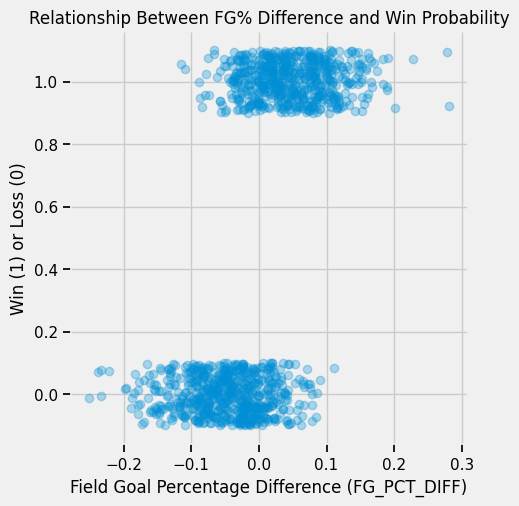

In [39]:
sns.lmplot(x='FG_PCT_DIFF', y='WON',
           data=games,
           fit_reg=False,
           y_jitter=0.1,
           scatter_kws={'alpha': 0.3})
plt.title('Relationship Between FG% Difference and Win Probability')
plt.xlabel('Field Goal Percentage Difference (FG_PCT_DIFF)')
plt.ylabel('Win (1) or Loss (0)')
plt.show()

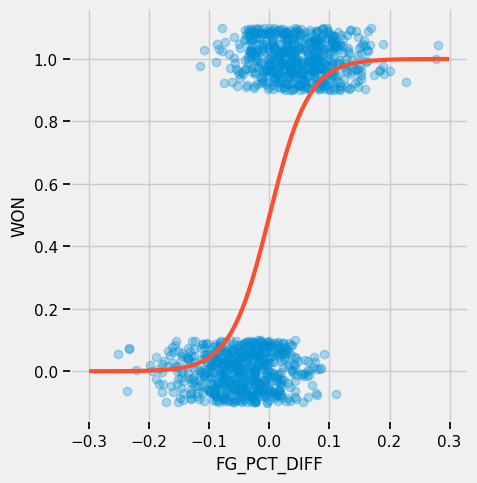

In [40]:
sns.lmplot(x='FG_PCT_DIFF', y='WON',
           data=games,
           fit_reg=False,
           y_jitter=0.1,
           scatter_kws={'alpha': 0.3})
plt.plot(np.arange(-0.3, 0.3, 0.001), 
        model.predict_proba(np.arange(-0.3, 0.3, 0.001).reshape(-1, 1))[:, 1],
        '#fc4f30', lw=3)

## Wrapping It All Up 🎁

In this notebook, we explored the process of predicting basketball game outcomes using **logistic regression**. Here’s a quick recap of what we covered:

1. **Data Preparation**: We started by loading and cleaning the NBA dataset, transforming categorical data like win/loss into numerical form to help our model understand it. We also calculated **Field Goal Percentage Difference (FG_PCT_DIFF)** as our key feature for predicting game results.

2. **Logistic Regression Modeling**: We used **Scikit-Learn's LogisticRegression** to build a model that predicts whether a team will win or lose based on **FG_PCT_DIFF**. We went through model fitting, viewing model parameters, and understanding the relationship between field goal percentage difference and winning probability.

3. **Model Predictions**: We demonstrated how to use the model to predict game outcomes and probabilities, both for individual examples and for the entire dataset.

4. **Visualization**: To bring our results to life, we used **Seaborn** to visualize the relationship between **FG_PCT_DIFF** and the outcome of games. We saw that as **FG_PCT_DIFF** increased, the likelihood of winning generally increased as well.

### Key Takeaways 🔑

- **Logistic Regression** is a powerful tool for binary classification problems, like predicting win or loss based on game statistics.
- **Data Preprocessing** is critical: Transforming categorical variables and scaling numerical ones ensures the model can learn effectively.
- **Field Goal Percentage Matters**: We saw a clear relationship between **FG_PCT_DIFF** and the probability of winning, providing insight into the importance of shooting accuracy.

In our next steps, we would focus on improving our model's performance by diving deeper into **Scikit-Learn** and experimenting with techniques like **cross-validation** and **hyperparameter tuning** to make our model more robust.

---

Stay tuned for more exciting data adventures! 🎉📊
